Cost after iteration 0: 0.6218920374695105
Cost after iteration 100: 0.4640185943407015
Cost after iteration 200: 0.40640996097216303
Cost after iteration 300: 0.38079301814932914
Cost after iteration 400: 0.3677149263100054
Cost after iteration 500: 0.36041123986915663
Cost after iteration 600: 0.3560770082230758
Cost after iteration 700: 0.35339201161717443
Cost after iteration 800: 0.35167539500123796
Cost after iteration 900: 0.3505514407061834
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-Score: 0.80


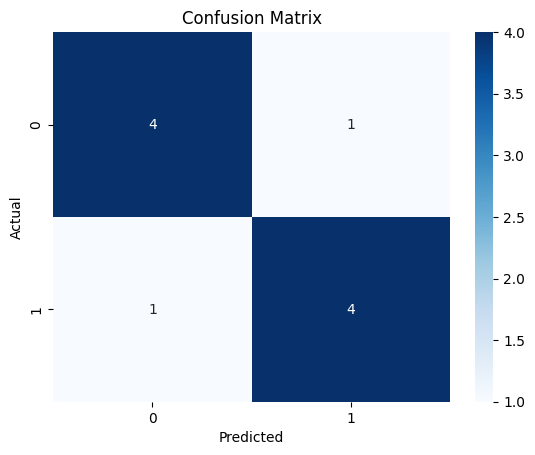

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Función Sigmoidea
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de Costo (Log Loss)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    A = sigmoid(z)
    cost = - (1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return cost

# Función de Descenso de Gradiente
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        A = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (A - y))
        db = (1 / m) * np.sum(A - y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Cost after iteration {i}: {cost}")

    return w, b

# Crear un conjunto de datos sencillo
X_train = np.array([[0.5], [2.3], [2.9], [3.3], [4.1], [6.8], [7.5], [8.2], [9.0], [10.5]])
y_train = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Inicializar los parámetros
w = np.zeros(X_train.shape[1])
b = 0
learning_rate = 0.1
num_iterations = 1000

# Entrenar el modelo
w, b = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

# Hacer Predicciones
def predict(X, w, b):
    z = np.dot(X, w) + b
    A = sigmoid(z)
    return A >= 0.5  # Devuelve True si la probabilidad es mayor o igual a 0.5, lo que se traduce en clase 1

y_pred_train = predict(X_train, w, b)

# Calcular las Métricas y la Matriz de Confusión
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Mostrar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
